In [1]:
import requests
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from PIL import Image
from tensorflow.keras.applications import VGG16
%matplotlib inline


In [2]:
train_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split\training'
val_dir = r'C:\Users\HP\Documents\SEMESTER 6\BANGKIT 2023\DATASET\Fitur1_split\validation'

train_datagen = ImageDataGenerator(
                     rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',   
                    )



In [3]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        shuffle =True,
        class_mode='categorical',
        )

validation_generator = train_datagen.flow_from_directory(
        val_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 100x150 piksel
        # shuffle =True,
        class_mode='categorical',
        )  

Found 2400 images belonging to 8 classes.
Found 1200 images belonging to 8 classes.


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Membekukan semua layer yang sudah ada di model VGG16
for layer in base_model.layers:
    layer.trainable = False


In [5]:
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.2),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(8, activation='softmax')
# ])

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu')),
model.add(Dense(8, activation='softmax')) 

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.86):
      print("\nAkurasi telah mencapai >86%!")
      self.model.stop_training = True
callbacks = myCallback()


In [7]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


hist = model.fit(
    train_generator,
    steps_per_epoch= 64,  
    epochs= 50,  
    validation_data=validation_generator,
    validation_steps= 32,  
    batch_size= 128,  
    callbacks=[callbacks]
)


Epoch 1/50
64/64 [==============================] - 291s 5s/step - loss: 1.6778 - accuracy: 0.6729 - val_loss: 1.1657 - val_accuracy: 0.7158
Epoch 2/50
64/64 [==============================] - 458s 7s/step - loss: 0.5086 - accuracy: 0.8359 - val_loss: 0.6564 - val_accuracy: 0.8135
Epoch 3/50
64/64 [==============================] - 449s 7s/step - loss: 0.3532 - accuracy: 0.8901 - val_loss: 0.5127 - val_accuracy: 0.8555
Epoch 4/50
64/64 [==============================] - 452s 7s/step - loss: 0.3062 - accuracy: 0.9097 - val_loss: 0.6498 - val_accuracy: 0.8320
Epoch 5/50
64/64 [==============================] - 497s 8s/step - loss: 0.2348 - accuracy: 0.9282 - val_loss: 0.7172 - val_accuracy: 0.8047
Epoch 6/50
64/64 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.9365
Akurasi telah mencapai >86%!
64/64 [==============================] - 508s 8s/step - loss: 0.1972 - accuracy: 0.9365 - val_loss: 0.5232 - val_accuracy: 0.8643


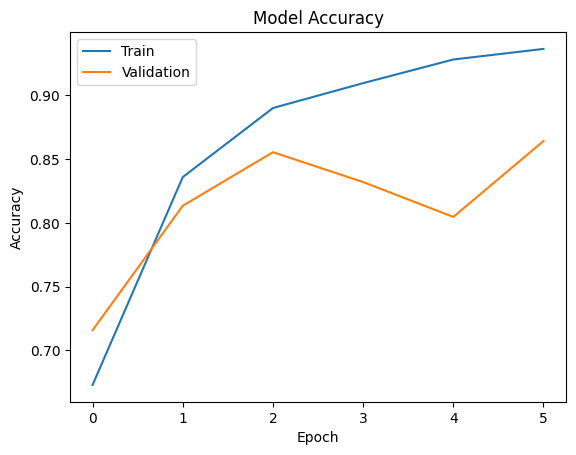

In [10]:
# Menampilkan plot akurasi pelatihan
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

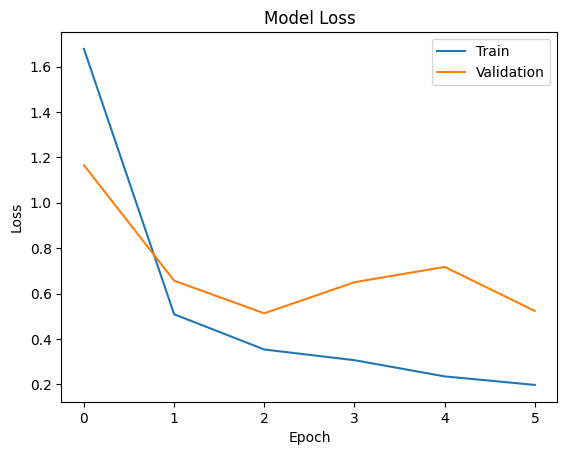

In [11]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

KLASIFIKASI KATEGORI 8 jenis barang
silahkan upload gambar SPEAKER



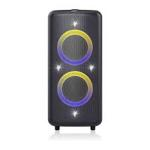

1/1 [==============================] - 2s 2s/step
HASIL DETEKSINYA: 

Berhasil mengupload SPEAKER


In [15]:
print("KLASIFIKASI KATEGORI 8 jenis barang")
inputan = input("Masukkan jenis kategori =  ").upper()
if inputan in ['LCD', 'MATRAS', 'TENDA', 'CAMERA', 'SEPATU', 'SPEAKER','PS','TAS']:
    print("silahkan upload gambar", inputan)
    print()

    # Terima input gambar dari user
    path = input("Masukkan path gambar: ")

    # Mengubah ukuran gambar sesuai dengan kebutuhan model
    img = Image.open(path).resize((150,150))

    # Menampilkan gambar yang di-upload
    display(img)

    # Mengubah gambar menjadi array
    x = np.array(img)
    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)
    # Menggabungkan array menjadi stack
    images = np.vstack([x])

    # Melakukan prediksi dengan model
    classes = model.predict(images, batch_size=10)

    # Cek hasil prediksi
    print("HASIL DETEKSINYA: ")
    print()

    if classes[0][0] == 1:
        hasil = 'CAMERA'
    elif classes[0][1] == 1:
        hasil = 'LCD'
    elif classes[0][2] == 1:
        hasil = 'MATRAS'
    elif classes[0][3] == 1:
        hasil = 'PS'
    elif classes[0][4] == 1:
        hasil = 'SEPATU' 
    elif classes[0][5] == 1:
        hasil = 'SPEAKER' 
    elif classes[0][6] == 1:
        hasil = 'TAS'
    elif classes[0][7] == 1:
        hasil = 'TENDA'        
    else:
        print('Gambar SALAH')
        hasil = None

    if hasil is not None:
        if inputan == hasil:
            print("Berhasil mengupload", hasil)
        else:
            print("Gagal, gambar tersebut adalah", hasil, "bukan ", inputan)
else:
    print("kategori", inputan, "tidak tersedia")







#1 tes tas = Yes   
#2 tes speaker = YES  
#3 tes lcd = YES      
#4 tes matras= YES    
#5 tes ps = NO       
#6 tes sepatu = YES   
#7 tes tenda = YES
#8 tes CAMERA = NO   
      